In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt
from joblib import load
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
from tqdm import tqdm
from __future__ import division
import numpy as np
import pandas as pd
import math as math
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process.kernels import Matern, RationalQuadratic,ExpSineSquared,PairwiseKernel
from tqdm import tqdm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
from sklearn.model_selection import KFold
from sklearn.gaussian_process.kernels import (StationaryKernelMixin,NormalizedKernelMixin,Kernel,Hyperparameter,squareform,pdist,cdist)
import scipy.spatial.distance as distance
import joblib
import matplotlib.pyplot as plt
import os
from scipy.interpolate import RBFInterpolator

In [48]:
columns = ["x","y","z","w","data","error"]
datatab = pd.read_table(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Data\Updateddata.txt",names = columns)
datatab
x = datatab['x']
y = datatab['y']
z = datatab['z']
w = datatab['w']
data = datatab['data']
error = datatab['error']

# First Mass
datam1 = datatab[0:250]
xm1 = datam1['x'].values
ym1 = datam1['y'].values
zm1 = datam1['z'].values
wm1 = datam1['w'].values
dm1 = datam1['data'].values
em1 = datam1['error'].values
X1 = np.column_stack((xm1, ym1, zm1, wm1))

# Second Mass
datam2 = datatab[250:500]
xm2 = datam2['x'].values
ym2 = datam2['y'].values
zm2 = datam2['z'].values
wm2 = datam2['w'].values
dm2 = datam2['data'].values
em2 = datam2['error'].values
X2 = np.column_stack((xm2, ym2, zm2, wm2))

# Third Mass
datam3 = datatab[500:750]
xm3 = datam3['x'].values
ym3 = datam3['y'].values
zm3 = datam3['z'].values
wm3 = datam3['w'].values
dm3 = datam3['data'].values
em3 = datam3['error'].values
X3 = np.column_stack((xm3, ym3, zm3, wm3))

# Fourth Mass
datam4 = datatab[750:]
xm4 = datam4['x'].values
ym4 = datam4['y'].values
zm4 = datam4['z'].values
wm4 = datam4['w'].values
dm4 = datam4['data'].values
em4 = datam4['error'].values
X4 = np.column_stack((xm4, ym4, zm4, wm4))

X = np.column_stack((x,y, z, w))
D = np.concatenate((dm1,dm2,dm3,dm4))
E = np.concatenate((em1,em2,em3,em4))

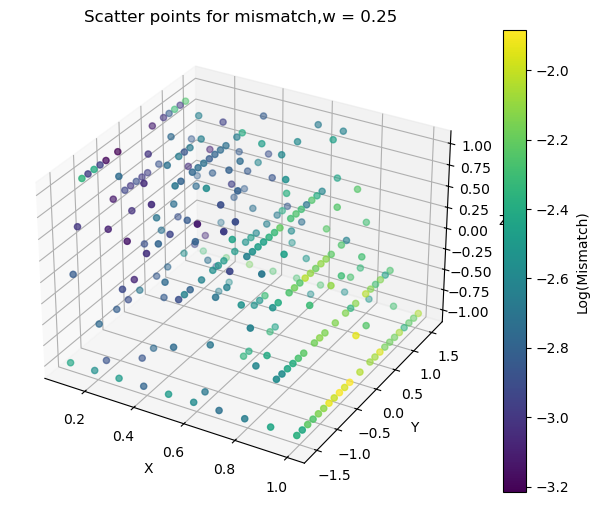

In [3]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(xm1, ym1, zm1, c=dm1, cmap='viridis')
cb = plt.colorbar(sc, ax=ax, label='Log(Mismatch)')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Scatter points for mismatch,w = 0.25')
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\latex\LatexPlots\final_gps_plots\3ddata_visual", dpi=72, bbox_inches='tight')
plt.show()

0.0


(0.05, 1.0)

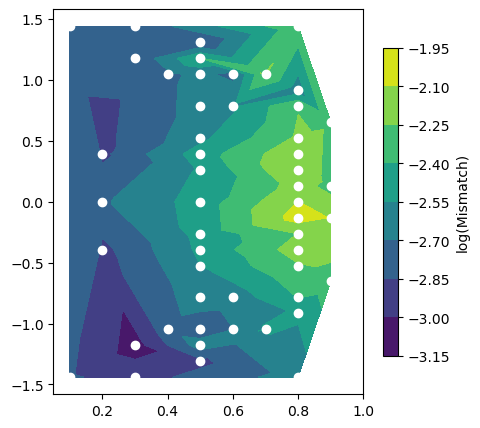

In [4]:
### interpolate on this
xdomain = np.linspace(0.1, 1, 1000)
ydomain = np.linspace(-np.pi/2,np.pi/2,1000)
zdomain = np.linspace(-1,1,1000)

# Assuming indices, indicestrain, and indicestest have been defined beforehand, for example:
# indices = np.arange(len(xm1))

zpoints = np.linspace(-1, 1, 5)  # 5 evenly spaced z-points
zpoint = zpoints[2]
print(zpoint)

indices = np.arange(X1.shape[0])
inds = np.isclose(zm1, zpoint)
indices_z = indices[inds]

d_z = dm1[inds]
xm1_z = xm1[inds]
ym1_z = ym1[inds]
zm1_z = zm1[inds]

fig = plt.figure(figsize=(5, 5))

contour = plt.tricontourf(xm1_z, ym1_z, d_z, cmap='viridis')
cbar = fig.colorbar(contour, orientation='vertical', shrink=0.8)
cbar.set_label('log(Mismatch)')
plt.scatter(xm1_z,ym1_z,color='white')
plt.ylim((-np.pi/2-0.01,np.pi/2+0.01))
plt.xlim((0.1-0.05,1))
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\latex\LatexPlots\final_gps_plots\2ddata_visual", dpi=72, bbox_inches='tight')


0.8
[-2.83162783 -2.80917421 -2.89106548 -2.72118608 -2.88411431 -2.91575924
 -3.06671507 -2.82454936 -2.8182423  -2.75942051 -2.72750369 -2.8890825
 -2.62605631 -2.7985699  -2.62067178 -2.5504062  -2.51942185 -2.50323972
 -2.4898849  -2.53348981 -2.47791034 -2.58934079 -2.63937446 -2.66584569
 -2.39777628 -2.84210497 -2.70241842 -2.63510704 -2.57724892 -2.73756637
 -2.53974292 -2.23637277 -2.6304203  -2.53314107 -2.39458837 -2.26031322
 -2.17850097 -2.24649481 -2.03234936 -2.09803469 -2.18495041 -2.10506488
 -2.12775102 -2.22496294 -2.25854365 -2.63156776 -2.29526599 -2.3108298
 -2.10652224 -2.3031728  -2.28718717]


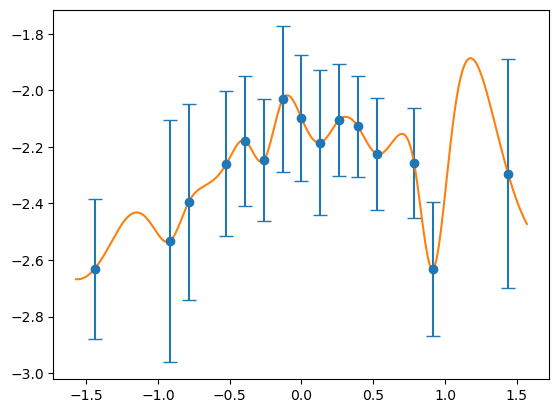

In [5]:
### interpolate on this
xdomain = np.linspace(0.1, 1, 1000)
ydomain = np.linspace(-np.pi/2,np.pi/2,1000)
zdomain = np.linspace(-1,1,1000)

### Values data lies on
ypoints = np.linspace(-np.pi/2,np.pi/2,25)
xpoints = np.linspace(0.1,1,10)
zpoints = np.linspace(-1,1,5)

i = 7           
xpoint = xpoints[i]
print(xpoint)

j = 2
zpoint = zpoints[j]

interpdomain = np.column_stack([xm1_z,ym1_z])  ## shape 250 , 3
cutpoints = np.column_stack([np.full(1000,xpoint),ydomain]) ## shape 1000, 3
### RBF interpolation
print(d_z)
inds = np.isclose(xm1, xpoint) & np.isclose(zm1, zpoint)
xm1_xz = xm1[inds]
ym1_xz = ym1[inds]
dm1_xz = dm1[inds]
em1_xz = em1[inds]

plt.errorbar(ym1_xz.ravel(),dm1_xz.ravel(),yerr=em1_xz.ravel(),fmt='o', capsize=5)
#plt.scatter(ym1_xz,dm1_xz)
rbfinterp_d_z = RBFInterpolator(interpdomain,d_z, kernel='cubic')
d_z_interp = rbfinterp_d_z(cutpoints)
plt.plot(ydomain,d_z_interp)
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\latex\LatexPlots\final_gps_plots\1ddata_visual", dpi=72, bbox_inches='tight')

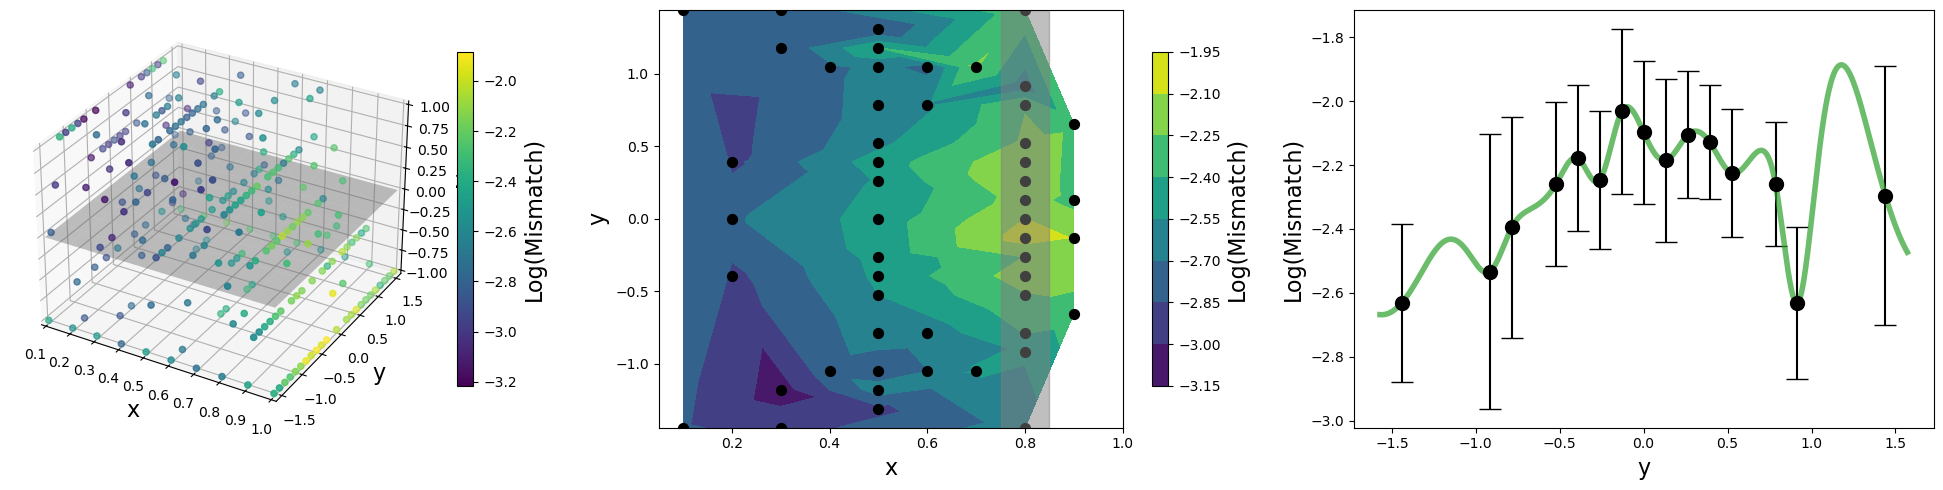

In [ ]:
# === PLOTTING ===
fig = plt.figure(figsize=(20, 5))

# --- Plot 1: 3D scatter ---
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
sc = ax1.scatter(xm1, ym1, zm1, c=dm1, cmap='viridis')
#ax1.set_title("3D Scatter of Data w = 0.25", fontsize=16)
ax1.set_xlabel("x", fontsize=16)
ax1.set_ylabel("y", fontsize=16)
ax1.set_zlabel("z", fontsize=16)
ax1.set_xlim(0.1, 1.0)
ax1.set_ylim(-np.pi/2, np.pi/2)
ax1.set_zlim(-1.0, 1.0)
cbar = fig.colorbar(sc, ax=ax1, orientation='vertical', shrink=0.8)
cbar.set_label("Log(Mismatch)", fontsize=16)

# Define a grid for the x and y coordinates
x_plane = np.linspace(0.1, 1.0, 10)
y_plane = np.linspace(-np.pi/2, np.pi/2, 10)
x_grid, y_grid = np.meshgrid(x_plane, y_plane)
z_grid = np.zeros_like(x_grid)  # z = 0 plane

# Plot the shaded plane
ax1.plot_surface(x_grid, y_grid, z_grid, alpha=0.4, color='gray', zorder=0)

# --- Plot 2: 2D Contour ---
ax2 = fig.add_subplot(1, 3, 2)
contour = ax2.tricontourf(xm1_z, ym1_z, d_z, cmap='viridis')
ax2.scatter(xm1_z, ym1_z, color='black', s=50)
ax2.set_xlim((0.1 - 0.05, 1))
#ax2.set_ylim((-np.pi/2 - 0.01, np.pi/2 + 0.01))
#ax2.set_title(f"2D Contour at z = {zpoint:.2f} and w = 0.25", fontsize=16)
ax2.set_xlabel("x", fontsize=16)
ax2.set_ylabel("y", fontsize=16)
cbar = fig.colorbar(contour, ax=ax2, orientation='vertical', shrink=0.8)
cbar.set_label("Log(Mismatch)", fontsize=16)

# Shade region around x = 0.2
x_val = 0.8
ax2.axvspan(x_val - 0.05, x_val + 0.05, color='gray', alpha=0.5, label="x = 0.2")


# --- Plot 3: Cross-cut & interpolation ---
ax3 = fig.add_subplot(1, 3, 3)
ax3.errorbar(ym1_xz, dm1_xz, yerr=em1_xz, fmt='o', capsize=8, color='black', markersize=10)
ax3.plot(ydomain, d_z_interp, color='tab:green', linewidth=4,alpha=0.7)
#ax3.set_title(f"Cross-section at x={xpoint:.2f}, z={zpoint:.2f} and w = 0.25", fontsize=16)
ax3.set_xlabel("y", fontsize=16)
ax3.set_ylabel("Log(Mismatch)", fontsize=16)
#ax3.legend()

plt.tight_layout()
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\latex\LatexPlots\final_gps_plots\data_visual", dpi=72, bbox_inches='tight')
plt.show()



C:\Users\seanw\AppData\Local\Temp\ipykernel_16500\1263926689.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


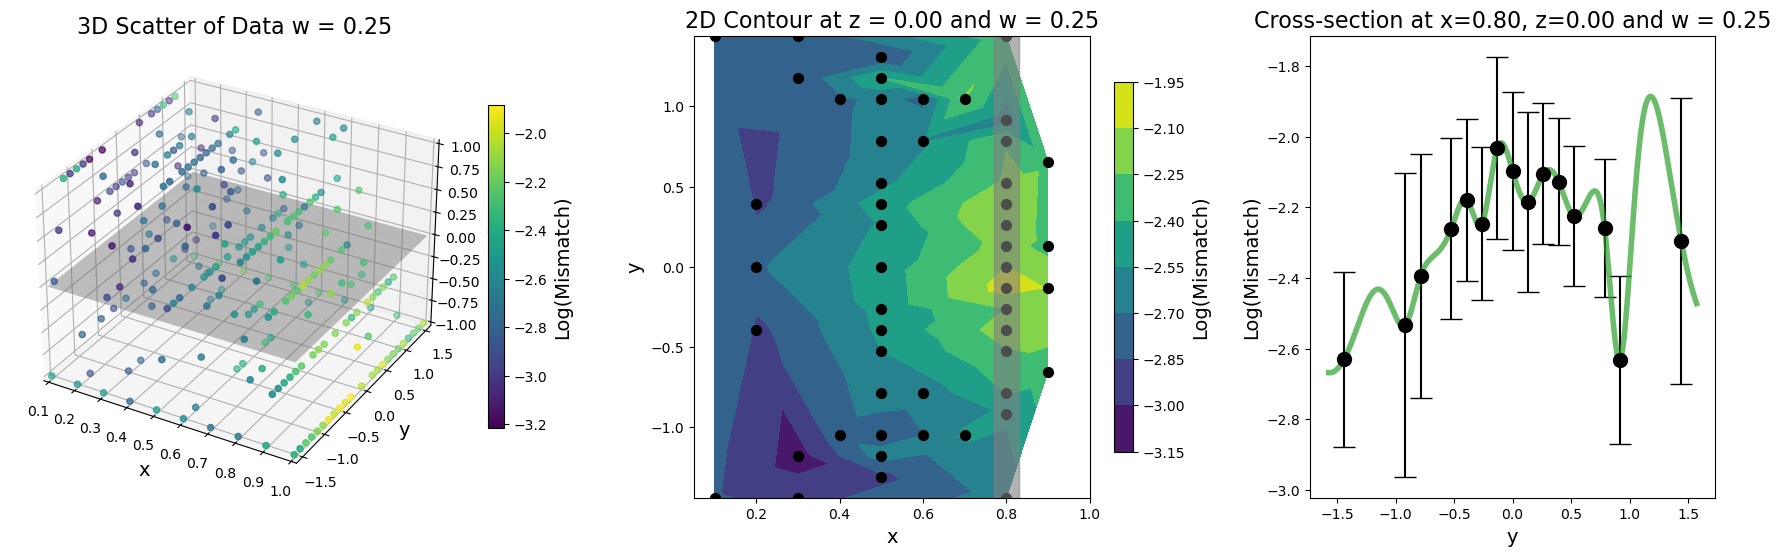

In [ ]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(22, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[1.25, 1.1, .9],wspace=0.25)  # Make the 3D plot 1.5x wider

# --- Plot 1: 3D scatter ---
ax1 = fig.add_subplot(gs[0], projection='3d')
sc = ax1.scatter(xm1, ym1, zm1, c=dm1, cmap='viridis')
ax1.set_title("3D Scatter of Data w = 0.25", fontsize=16)
ax1.set_xlabel("x", fontsize=14)
ax1.set_ylabel("y", fontsize=14)
ax1.set_zlabel("z", fontsize=14)
ax1.set_xlim(0.1, 1.0)
ax1.set_ylim(-np.pi/2, np.pi/2)
ax1.set_zlim(-1.0, 1.0)
cbar = fig.colorbar(sc, ax=ax1, shrink=0.7)
cbar.set_label("Log(Mismatch)", fontsize=14)


x_plane = np.linspace(0.1, 1.0, 10)
y_plane = np.linspace(-np.pi/2, np.pi/2, 10)
x_grid, y_grid = np.meshgrid(x_plane, y_plane)
z_grid = np.zeros_like(x_grid)
ax1.plot_surface(x_grid, y_grid, z_grid, alpha=0.4, color='gray', zorder=0)


ax2 = fig.add_subplot(gs[1])
contour = ax2.tricontourf(xm1_z, ym1_z, d_z, cmap='viridis')
ax2.scatter(xm1_z, ym1_z, color='black', s=50)
ax2.set_xlim((0.05, 1))
ax2.set_title(f"2D Contour at z = {zpoint:.2f} and w = 0.25", fontsize=16)
ax2.set_xlabel("x", fontsize=14)
ax2.set_ylabel("y", fontsize=14)
cbar = fig.colorbar(contour, ax=ax2, shrink=0.8)
cbar.set_label("Log(Mismatch)", fontsize=14)
ax2.axvspan(x_val - 0.03, x_val + 0.03, color='gray', alpha=0.6)

ax3 = fig.add_subplot(gs[2])
ax3.errorbar(ym1_xz, dm1_xz, yerr=em1_xz, fmt='o', capsize=8, color='black', markersize=10)
ax3.plot(ydomain, d_z_interp, color='tab:green', linewidth=4, alpha=0.7)
ax3.set_title(f"Cross-section at x={xpoint:.2f}, z={zpoint:.2f} and w = 0.25", fontsize=16)
ax3.set_xlabel("y", fontsize=14)
ax3.set_ylabel("Log(Mismatch)", fontsize=14)

plt.tight_layout()
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\latex\LatexPlots\final_gps_plots\data_visual", dpi=72, bbox_inches='tight')
plt.show()


[[0.         0.04166667 0.08333333 0.125      0.16666667 0.20833333
  0.25       0.29166667 0.33333333 0.375      0.41666667 0.45833333
  0.5        0.54166667 0.58333333 0.625      0.66666667 0.70833333
  0.75       0.79166667 0.83333333 0.875      0.91666667 0.95833333
  1.        ]
 [0.         0.04166667 0.08333333 0.125      0.16666667 0.20833333
  0.25       0.29166667 0.33333333 0.375      0.41666667 0.45833333
  0.5        0.54166667 0.58333333 0.625      0.66666667 0.70833333
  0.75       0.79166667 0.83333333 0.875      0.91666667 0.95833333
  1.        ]
 [0.         0.04166667 0.08333333 0.125      0.16666667 0.20833333
  0.25       0.29166667 0.33333333 0.375      0.41666667 0.45833333
  0.5        0.54166667 0.58333333 0.625      0.66666667 0.70833333
  0.75       0.79166667 0.83333333 0.875      0.91666667 0.95833333
  1.        ]
 [0.         0.04166667 0.08333333 0.125      0.16666667 0.20833333
  0.25       0.29166667 0.33333333 0.375      0.41666667 0.45833333
  0.5 

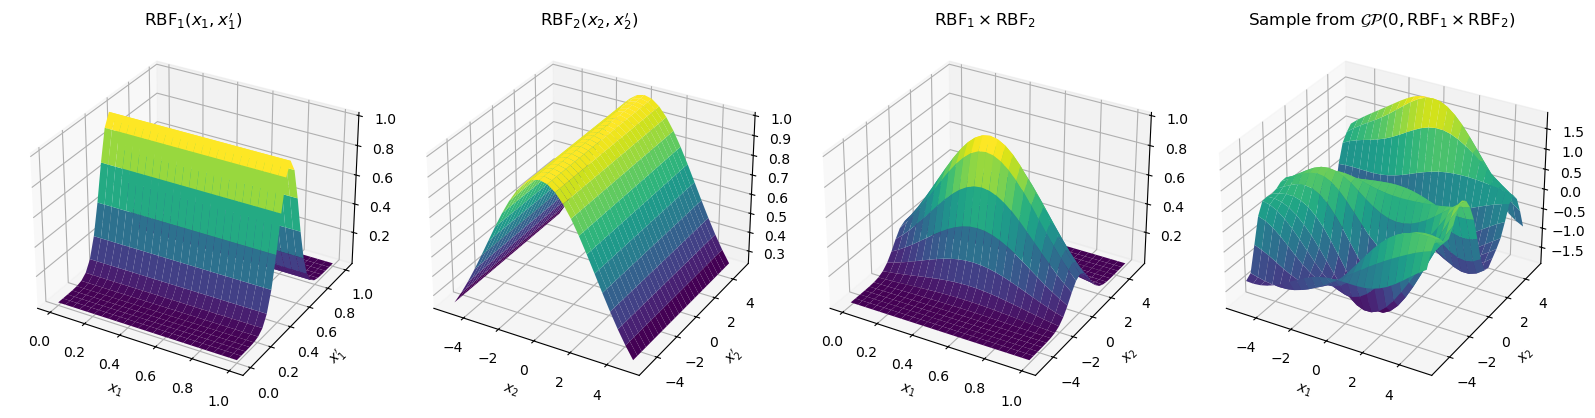

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process.kernels import RBF
from scipy.linalg import cholesky

np.random.seed(42)
# 1. Create 1D input grids
x1 = np.linspace(0, 1, 25).reshape(-1, 1)
x2 = np.linspace(-5, 5, 25).reshape(-1, 1)


X11_grid, X22_grid = np.meshgrid(x1, x2)  # for plotting only
print(X1_grid)

length_scale1 = 0.1
length_scale2 = 3
rbf1 = RBF(length_scale=length_scale1)
rbf2 = RBF(length_scale = length_scale2)
print(x1[12])
print(x2[12])
K1 = rbf1(x1, x1)  # (50x50)
K2 = rbf2(x2, x2)  # (50x50)


K1_plot = np.outer(K1[:, 12], np.ones(25))  # Fix x1' = x1[25]
K2_plot = np.outer(np.ones(25), K2[:, 12])  # Fix x2' = x2[25]
K_product_plot = K1_plot * K2_plot

x_grid = np.linspace(0,1,25)
X_grid, Xp_grid = np.meshgrid(x_grid, x_grid)

x2_grid = np.linspace(-5,5,25)
X2_grid, X2p_grid = np.meshgrid(x2_grid, x2_grid)
xf_grid = np.linspace(-5,5,25)
Xf_grid, Xfp_grid = np.meshgrid(xf_grid, xf_grid)



K_product = np.kron(K1, K2)


mean = np.zeros(K_product.shape[0])
cov = K_product + 1e-6 * np.eye(K_product.shape[0])  # add jitter for stability
gp_sample = np.random.multivariate_normal(mean, cov).reshape(25, 25)

# 6. Plotting
fig = plt.figure(figsize=(16, 4))

def plot_surface(ax, X, Y, Z, title):
    ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor='none')
    ax.set_title(title, fontsize=12)

# Subplots
ax1 = fig.add_subplot(1, 4, 1, projection='3d')
plot_surface(ax1, X_grid, Xp_grid, K1_plot, r"$\mathrm{RBF}_1(x_1, x_1')$")
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_1\'$')

ax2 = fig.add_subplot(1, 4, 2, projection='3d')
plot_surface(ax2, X2_grid, X2p_grid, K2_plot, r"$\mathrm{RBF}_2(x_2, x_2')$")
ax2.set_xlabel('$x_2$')
ax2.set_ylabel('$x_2\'$')


ax3 = fig.add_subplot(1, 4, 3, projection='3d')
plot_surface(ax3, X11_grid, X22_grid, K_product_plot, r"$\mathrm{RBF}_1 \times \mathrm{RBF}_2$")
ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')

ax4 = fig.add_subplot(1, 4, 4, projection='3d')
plot_surface(ax4, Xf_grid, Xfp_grid, gp_sample, r"Sample from $\mathcal{GP}(0, \mathrm{RBF}_1 \times \mathrm{RBF}_2)$")
ax4.set_xlabel('$x_1$')
ax4.set_ylabel('$x_2$')

plt.tight_layout()
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\final_gps_plots\2dkernels",dpi=72, bbox_inches='tight')
plt.show()
